# Time Series

A simple example to show Time Series forecasting using ARIMA

Source:<br>
https://beta.bls.gov/dataViewer/view

Labor Force Statistics from the Current Population Survey

Series Title 	: 	(Seas) Unemployment Rate
Series ID 	: 	LNS14000000
Seasonality 	: 	Seasonally Adjusted
Survey Name 	: 	Labor Force Statistics from the Current Population Survey
Measure Data Type 	: 	Percent or rate
Industry 	: 	All Industries
Occupation 	: 	All Occupations
Labor Force Status 	: 	Unemployment rate
Age 	: 	16 years and over
Ethnicity 	: 	All Origins
Race 	: 	All Races
Gender 	: 	Both Sexes
Marital Status 	: 	All marital statuses
Education or Training 	: 	All educational levels

Import Libraries

In [1]:
import datetime as dt
now1 = dt.datetime.now()

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
plt.style.use("fivethirtyeight")

C:\ProgramData\Anaconda3\envs\tf-gpu+base_test\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\tf-gpu+base_test\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Read Data (from csv file)

In [2]:
headers = [pd.read_csv('data.csv', nrows=1)]
headers

[       Series ID  Year Period     Label  Value
 0  CES0000000001  1939    M01  1939 Jan  29923]

In [3]:
df = pd.read_csv('data.csv', usecols=['Label','Value'])
df.columns = ['year', 'value']
df

,year,value
0,1939 Jan,29923
1,1939 Feb,30100
2,1939 Mar,30280
3,1939 Apr,30094
4,1939 May,30299
...,...,...
966,2019 Jul,151418
967,2019 Aug,151637
968,2019 Sep,151830
969,2019 Oct,151986


Buid ARIMA model

In [4]:
model = pm.auto_arima(df.value, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=17099.383, BIC=17113.981, Fit time=1.090 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=17139.245, BIC=17148.977, Fit time=0.069 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=14702.206, BIC=14721.670, Fit time=9.627 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=15983.027, BIC=16002.491, Fit time=6.898 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=15022.084, BIC=15036.682, Fit time=1.226 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=14662.267, BIC=14686.596, Fit time=17.973 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=14564.247, BIC=14593.442, Fit time=20.691 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=17096.025, BIC=17120.354, Fit time=4.466 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=14346.930, BIC=14380.991, Fit time=22.609 seconds
Fit ARI

Model Plots

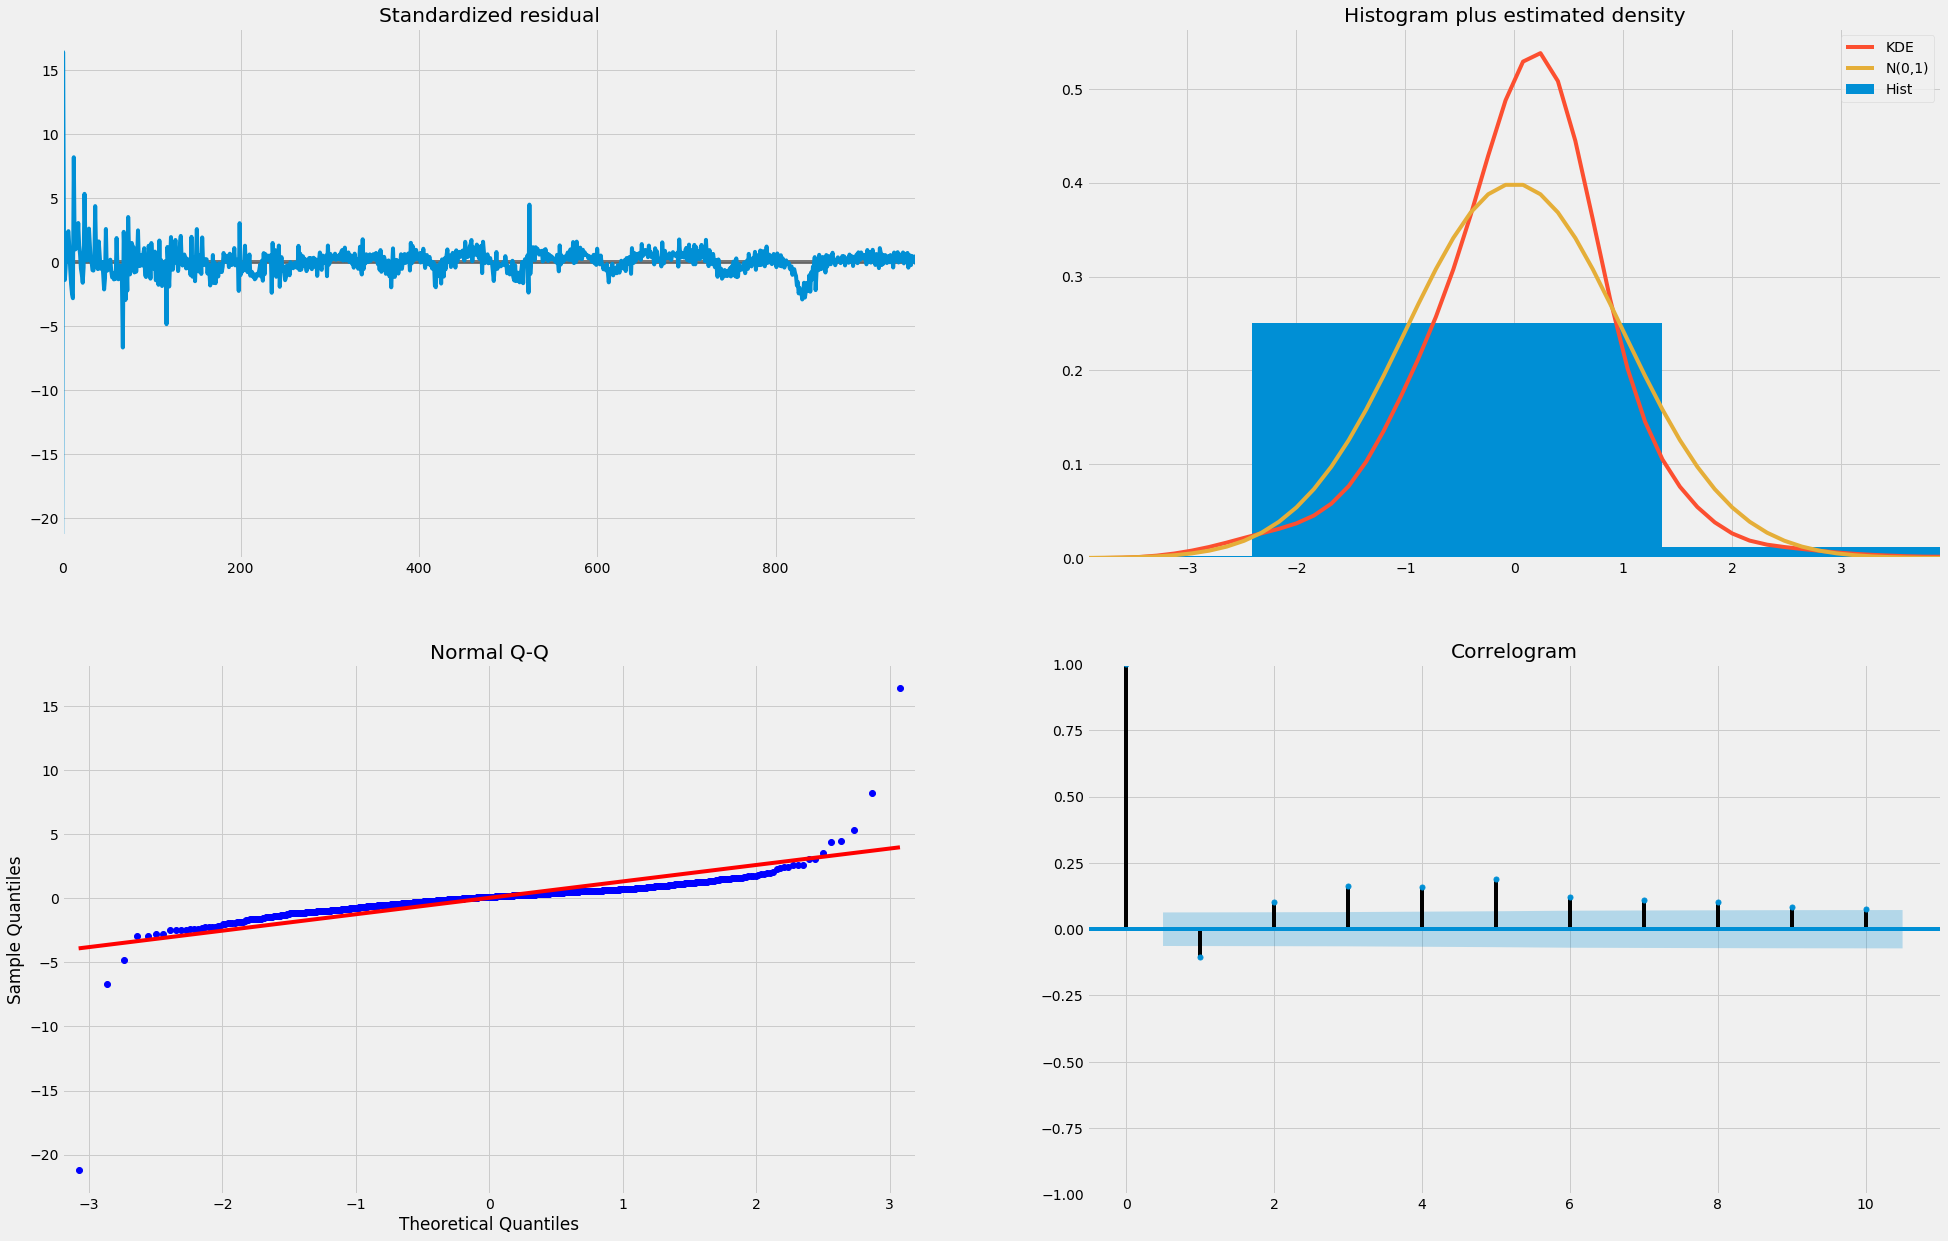

In [5]:
model.plot_diagnostics(figsize=(30,20))
plt.show()


Forecast

In [6]:
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(max(df.index)+1,max(df.index)+n_periods+1)
fc


array([152388.41427591, 152494.5671931 , 152552.95067314, 152592.1931905 ,
       152655.20207459, 152718.87243324])

In [7]:
confint

array([[151835.70663346, 152941.12191837],
       [151493.72676428, 153495.40762191],
       [151126.97674511, 153978.92460117],
       [150823.37164487, 154361.01473614],
       [150637.73912733, 154672.66502185],
       [150539.24350881, 154898.50135767]])

In [8]:
df.tail(1)

,year,value
970,2019 Nov,152252


Plot Forecasts

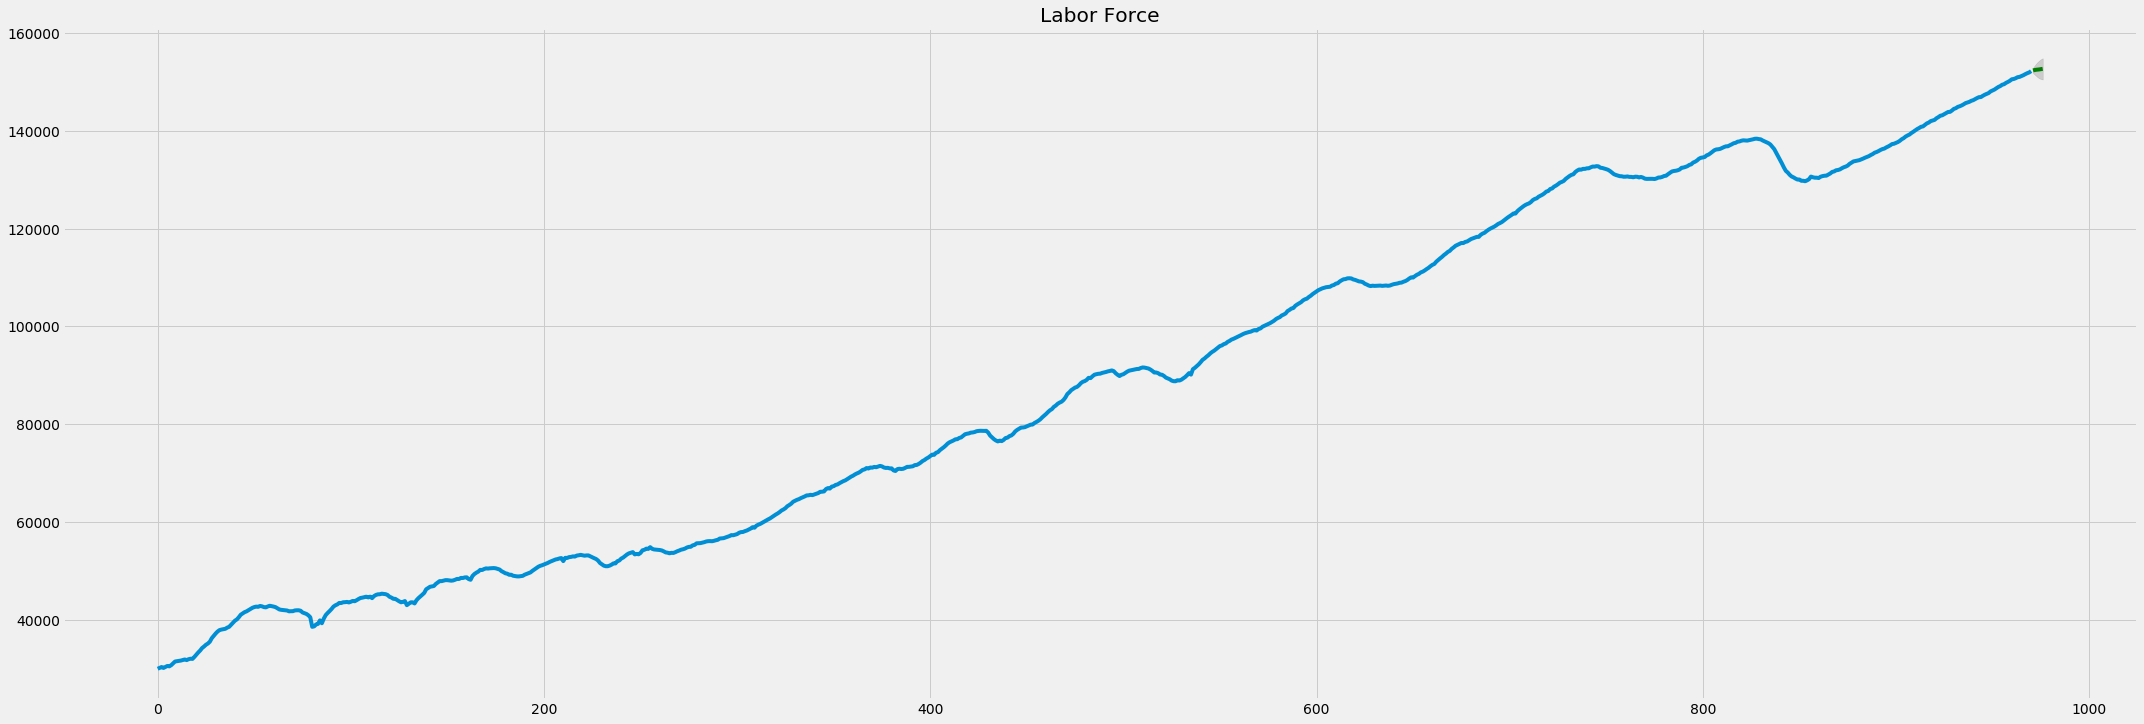

*********************************************************
*********************************************************
Processing Time:                       0:09:44.199036


In [9]:

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
rcParams['figure.figsize'] = 30,10
plt.plot(df.value)
plt.plot(fc_series, color='green')
plt.fill_between(fc_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
# plt.legend()
plt.tight_layout()
plt.title("Labor Force")

plt.show()

print("*********************************************************")
now2 = dt.datetime.now()

print("*********************************************************")
print("Processing Time:                      ",(now2-now1))

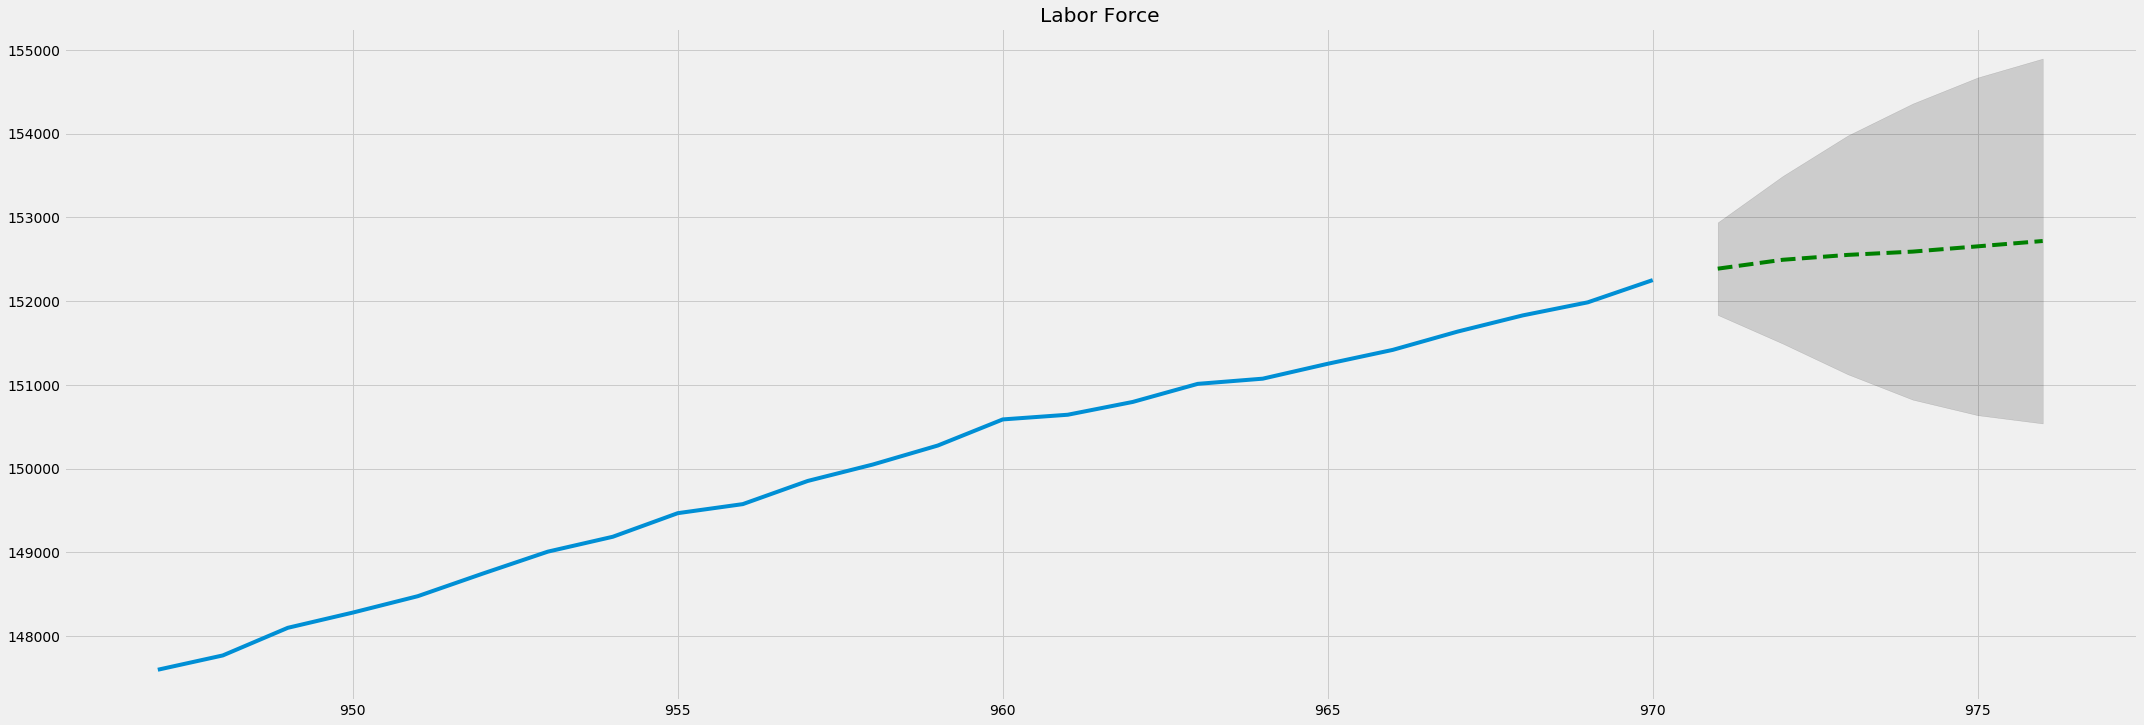

*********************************************************
*********************************************************
Processing Time:                       0:09:44.409083


In [10]:
# Zoom Plot
rcParams['figure.figsize'] = 30,10
plt.plot(df.value.tail(24))
plt.plot(fc_series, color='green', linestyle='dashed')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
# plt.legend()
plt.tight_layout()
plt.title("Labor Force")

plt.show()

print("*********************************************************")
now2 = dt.datetime.now()

print("*********************************************************")
print("Processing Time:                      ",(now2-now1))